# Correctness and personal data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions.tests.dependent_groups.two_groups import mcnemar_test
from functions.others import choose_dominant_kind, replace_to_categories
from functions.tests.posthoc import posthoc_nemenyi

In [13]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv', index_col='ID', usecols=['ID', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr', 'SumCorr_a', 'SumCorr_b'])

df_survey = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
).fillna('NO_VAL')

df_survey = df_survey[df_survey.ID != 6] 
df_survey.set_index('ID', inplace=True)

df_survey['MAT'] = df_survey['MAT_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['POL'] = df_survey['JP_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['HIST'] = df_survey['HIST_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['Typ_uczenia'] = df_survey.apply(choose_dominant_kind, axis=1)
df_survey['Kierunek_studiów'] = df_survey['Kierunek_studiów'].apply(lambda x: 'MISMaP Geografia' if x == 'Geografia, w ramach studiów międzyobszarowych' else x)
df_survey['Samopocz'] = df_survey['Samopocz'].apply(replace_to_categories)
df_survey['Stres'] = df_survey['Stres'].apply(replace_to_categories)
df_survey['Zmęcz'] = df_survey['Zmęcz'].apply(replace_to_categories)
df_survey['Czyt_map'] = df_survey['Czyt_map'].apply(replace_to_categories)
df_survey['Podziel_uwg'] = df_survey['Podziel_uwg'].apply(replace_to_categories)
df_survey['Analit_myśl'] = df_survey['Analit_myśl'].apply(replace_to_categories)
df_survey['Spostrzeg'] = df_survey['Spostrzeg'].apply(replace_to_categories)
df_survey['Czyt_ze_zroz'] = df_survey['Czyt_ze_zroz'].apply(replace_to_categories)

df_survey.drop(columns=['Daltonizm', 'JP_podst', 'MAT_podst', 'JP_roz', 'MAT_roz', 'FIZ_roz', 'HIST_roz', 'Wzrokowiec', 'Słuchowiec', 'Kinestetyk', 'Quest1_after', 'Quest2_after', 'Rank_map', 'Rank_plt', 'Rank_tab', 'Rank_txt', 'Data', 'Godzina'], inplace=True)

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/quest12.csv', usecols=['ID', 'Quest1_before', 'Quest2_before', 'Quest1_after', 'Quest2_after', 'is_change_1', 'is_change_2'], index_col='ID')

In [14]:
df_survey.head()

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,Czyt_map,Podziel_uwg,Analit_myśl,Spostrzeg,Czyt_ze_zroz,MAT,POL,HIST,Typ_uczenia
ID,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,wysoki,wysoki,wysoki,wysoki,wysoki,VAL,VAL,NO_VAL,Kinestetyk
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,wysoki,wysoki,średni,wysoki,wysoki,VAL,VAL,NO_VAL,Brak dominującego
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,wysoki,średni,wysoki,wysoki,wysoki,VAL,NO_VAL,NO_VAL,Wzrokowiec
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,wysoki,wysoki,wysoki,wysoki,wysoki,NO_VAL,VAL,NO_VAL,Brak dominującego
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,wysoki,średni,wysoki,wysoki,wysoki,NO_VAL,NO_VAL,NO_VAL,Wzrokowiec


In [15]:
merged_df = pd.merge(df_answers, df_survey, how='inner', left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df_quest, how='inner', left_index=True, right_index=True)

In [16]:
# sums
df_sum = df_survey.merge(df_quest, on='ID')
df_sum['corrA'] = df_answers['SumCorr_a']
df_sum['corrB'] = df_answers['SumCorr_b']
df_sum.head()

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,...,HIST,Typ_uczenia,Quest1_before,Quest2_before,Quest1_after,Quest2_after,is_change_1,is_change_2,corrA,corrB
ID,,,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,...,NO_VAL,Kinestetyk,B,wykres,B,wykres,False,False,2,2
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,...,NO_VAL,Brak dominującego,B,wykres,B,wykres,False,False,2,3
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,...,NO_VAL,Wzrokowiec,B,mapa,B,mapa,False,False,2,2
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,...,NO_VAL,Brak dominującego,B,mapa,B,wykres,False,True,3,2
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,...,NO_VAL,Wzrokowiec,B,tabela,B,tabela,False,False,3,3


In [17]:
# create pairs
df_1 = df_survey.merge(df_quest, on='ID')
df_1['corrA'] = df_answers['1a_corr']
df_1['corrB'] = df_answers['1b_corr']

df_2 = df_survey.merge(df_quest, on='ID')
df_2['corrA'] = df_answers['2a_corr']
df_2['corrB'] = df_answers['2b_corr']

df_3 = df_survey.merge(df_quest, on='ID')
df_3['corrA'] = df_answers['3a_corr']
df_3['corrB'] = df_answers['3b_corr']
df_3.head()

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,...,HIST,Typ_uczenia,Quest1_before,Quest2_before,Quest1_after,Quest2_after,is_change_1,is_change_2,corrA,corrB
ID,,,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,...,NO_VAL,Kinestetyk,B,wykres,B,wykres,False,False,1,1
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,...,NO_VAL,Brak dominującego,B,wykres,B,wykres,False,False,0,1
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,...,NO_VAL,Wzrokowiec,B,mapa,B,mapa,False,False,0,0
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,...,NO_VAL,Brak dominującego,B,mapa,B,wykres,False,True,1,0
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,...,NO_VAL,Wzrokowiec,B,tabela,B,tabela,False,False,1,1


In [18]:
dfs = [df_sum, df_1, df_2, df_3]
names = {
    1: 'Suma',
    2: '1',
    3: '2',
    4: '3'
}

H0: There are no statistically significant differences in the correctness of answers between groups A and B for feature X.

H1: There is a statistically significant difference in the correctness of answers between groups A and B for feature X.

Significance level: $\alpha = 0.05$

In [19]:
ALPHA = 0.05

In [20]:
def conduct_test(col):
    groups = df_1[col].unique()
    groupsStr = ''
    for group in groups:
        groupsStr += f"{group} "
    print(f'Groups: {groups}')
    for i, df in enumerate(dfs):
        test_dfs = [pd.DataFrame(data={
            'A': df['corrA'][df[col] == group], 
            'B': df['corrB'][df[col] == group]
        }) for group in groups]
    
        print('-------------------------------')
        print('Image:', names[i+1])
        for i in range(len(test_dfs)):
            print('Group:', groups[i])
            mcnemar_test(test_dfs[i], 'A', 'B', yate_flag=True, alpha=ALPHA)
            print('----------')

In [21]:
# sex
col = 'Płeć'
conduct_test(col)

Groups: ['M' 'K']
-------------------------------
Image: Suma
Group: M
B  1  2  3
A         
1  1  1  0
2  1  3  3
3  0  6  2
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: K
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  4  0
2  0  2  5  2
3  0  0  2  5
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: M
B  0   1
A       
1  1  16
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: K
B  0   1
A       
0  2   3
1  0  18
McNemar statistic: 0.0
p-value: 0.25
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: M
B  0  1
A      
0  3  2
1  3  9
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: K
B  0   1
A       
0  5   2
1  0  16
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 

In [22]:
# year of birth
col = 'Rok_urodzenia'
conduct_test(col)

Groups: [2002 2003 2001 2000 2004]
-------------------------------
Image: Suma
Group: 2002
B  1  2  3
A         
1  1  1  0
2  0  5  0
3  0  3  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 2003
B  1  2  3
A         
1  2  3  0
2  1  2  5
3  0  3  1
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
Group: 2001
B  0  1  2  3
A            
0  1  0  0  0
1  0  0  1  0
2  0  2  1  0
3  0  0  0  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 2000
B  2
A   
3  1
Only one sample
----------
Group: 2004
B  2  3
A      
3  1  2
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: 2002
B   1
A    
0   1
1  10
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 2003
B  0   1
A       
0  0   1
1  1  15
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, acce

In [23]:
# year of study
col = 'Rok_studiów'
conduct_test(col)

Groups: [2 1 3]
-------------------------------
Image: Suma
Group: 2
B  2
A   
1  1
2  4
3  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 1
B  0  1  2  3
A            
0  1  0  0  0
1  0  3  3  0
2  0  1  3  5
3  0  0  4  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 3
B  1  2  3
A         
1  0  1  0
2  2  1  0
3  0  1  4
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: 2
B  1
A   
1  8
Only one sample
----------
Group: 1
B  0   1
A       
0  1   2
1  1  19
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 3
B  0  1
A      
0  1  1
1  0  7
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: 2
B  0  1
A      
0  1  2
1  2  3
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
--------

In [24]:
# field of study
col = 'Kierunek_studiów'
conduct_test(col)

Groups: ['MISMaP Geografia' 'Gospodarka przestrzenna' 'Geografia']
-------------------------------
Image: Suma
Group: MISMaP Geografia
B  2  3
A      
2  1  0
3  1  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: Gospodarka przestrzenna
B  1  2  3
A         
1  1  0  0
2  1  0  2
3  0  1  0
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: Geografia
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  5  0
2  0  2  7  3
3  0  0  6  6
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: MISMaP Geografia
B  1
A   
1  3
Only one sample
----------
Group: Gospodarka przestrzenna
B  1
A   
1  5
Only one sample
----------
Group: Geografia
B  0   1
A       
0  2   3
1  1  26
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: MISMaP Geografia
B  0  1
A      
0 

In [25]:
# specialization
col = 'Specjalność'
conduct_test(col)

Groups: ['SPOŁ-EKO' 'NO_VAL' 'GEOINF ' 'FIZ ']
-------------------------------
Image: Suma
Group: SPOŁ-EKO
B  2  3
A      
1  1  0
2  4  1
3  1  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: NO_VAL
B  1  2  3
A         
1  1  0  0
2  1  0  2
3  0  1  0
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: GEOINF 
B  1  2  3
A         
1  1  3  0
2  2  3  0
3  0  4  5
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: FIZ 
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  1  0
2  0  0  1  2
3  0  0  2  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: SPOŁ-EKO
B  1
A   
1  8
Only one sample
----------
Group: NO_VAL
B  1
A   
1  5
Only one sample
----------
Group: GEOINF 
B  0   1
A       
0  1   2
1  1  14
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Gr

In [26]:
# eye disorders
col = 'Wady_wzroku'
conduct_test(col)

Groups: [0 1]
-------------------------------
Image: Suma
Group: 0
B  1  2  3
A         
1  2  1  0
2  1  4  1
3  0  3  4
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 1
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  4  0
2  0  2  4  4
3  0  0  5  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: 0
B  0   1
A       
0  1   1
1  1  13
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 1
B  0   1
A       
0  1   2
1  0  21
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: 0
B  0   1
A       
0  3   1
1  0  12
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 1
B  0   1
A       
0  5   3
1  3  13
McNemar statistic: 3.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------

In [27]:
# matura exam - Polish language - wrote / did not write
col = 'POL'
conduct_test(col)

Groups: ['VAL' 'NO_VAL']
-------------------------------
Image: Suma
Group: VAL
B  2  3
A      
1  2  0
2  3  2
3  2  0
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
Group: NO_VAL
B  0  1  2  3
A            
0  1  0  0  0
1  0  3  3  0
2  0  3  5  3
3  0  0  6  7
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: VAL
B  1
A   
0  1
1  8
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: NO_VAL
B  0   1
A       
0  2   2
1  1  26
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: VAL
B  0  1
A      
0  2  2
1  1  4
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: NO_VAL
B  0   1
A       
0  6   2
1  2  21
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Im

In [28]:
# matura exam - math - wrote / did not write
col = 'MAT'
conduct_test(col)

Groups: ['VAL' 'NO_VAL']
-------------------------------
Image: Suma
Group: VAL
B  1  2  3
A         
1  2  2  0
2  3  4  3
3  0  4  4
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: NO_VAL
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  3  0
2  0  0  4  2
3  0  0  4  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: VAL
B  0   1
A       
0  1   0
1  0  21
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: NO_VAL
B  0   1
A       
0  1   3
1  1  13
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: VAL
B  0   1
A       
0  5   3
1  3  11
McNemar statistic: 3.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: NO_VAL
B  0   1
A       
0  3   1
1  0  14
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
--------

In [29]:
# matura exam - history - wrote / did not write
col = 'HIST'
conduct_test(col)

Groups: ['NO_VAL' 'VAL']
-------------------------------
Image: Suma
Group: NO_VAL
B  0  1  2  3
A            
0  1  0  0  0
1  0  3  5  0
2  0  3  7  5
3  0  0  6  6
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: VAL
B  2  3
A      
2  1  0
3  2  1
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: NO_VAL
B  0   1
A       
0  2   3
1  1  30
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
Group: VAL
B  1
A   
1  4
Only one sample
----------
-------------------------------
Image: 2
Group: NO_VAL
B  0   1
A       
0  8   3
1  2  23
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: VAL
B  0  1
A      
0  0  1
1  1  2
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 3
Group: NO_VAL
B   0   1
A        
0  12   6
1   8  10
McNem

In [30]:
# dominant kind of learning
col = 'Typ_uczenia'
conduct_test(col)

Groups: ['Kinestetyk' 'Brak dominującego' 'Wzrokowiec' 'Słuchowiec']
-------------------------------
Image: Suma
Group: Kinestetyk
B  2
A   
2  2
Only one sample
----------
Group: Brak dominującego
B  1  2  3
A         
1  1  1  0
2  0  2  1
3  0  2  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: Wzrokowiec
B  1  2  3
A         
1  2  4  0
2  2  2  4
3  0  4  4
McNemar statistic: 2.0
p-value: 0.6875
No reason to reject H0, accept H0.
----------
Group: Słuchowiec
B  0  1  2
A         
0  1  0  0
2  0  1  2
3  0  0  2
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: Kinestetyk
B  1
A   
1  2
Only one sample
----------
Group: Brak dominującego
B  1
A   
0  1
1  9
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: Wzrokowiec
B  0   1
A       
0  1   2
1  1  18
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.

In [31]:
# hours of sleep
col = 'Ilość_snu'
conduct_test(col)

Groups: ['6' '<6' '8' '7' '8<']
-------------------------------
Image: Suma
Group: 6
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  0  0
2  0  1  3  2
3  0  0  1  2
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: <6
B  1  2  3
A         
1  0  4  0
2  1  0  2
3  0  1  2
McNemar statistic: 1.0
p-value: 0.375
No reason to reject H0, accept H0.
----------
Group: 8
B  2  3
A      
2  1  0
3  2  1
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
Group: 7
B  2  3
A      
2  4  1
3  2  2
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: 8<
B  1  2
A      
1  2  1
2  1  0
3  0  2
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: 6
B  0   1
A       
0  1   0
1  0  10
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: <6
B  0  1
A      
0  1  1
1  0  8
McNemar stat

In [32]:
# well-being
col = 'Samopocz'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Suma
Group: wysoki
B  1  2  3
A         
1  1  1  0
2  3  8  2
3  0  7  7
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
Group: średni
B  1  2  3
A         
1  1  3  0
2  0  0  1
3  0  1  0
McNemar statistic: 0.0
p-value: 0.25
No reason to reject H0, accept H0.
----------
Group: niski
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  1  0
2  0  0  0  2
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: wysoki
B  0   1
A       
0  1   1
1  1  26
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  1
A   
0  1
1  5
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  0  1
A      
0  1  1
1  0  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Im

In [33]:
posthoc_nemenyi(df_sum, 'Samopocz', 'corrA', 'corrB')

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0


In [34]:
# stress
col = 'Stres'
conduct_test(col)

Groups: ['niski' 'średni' 'wysoki']
-------------------------------
Image: Suma
Group: niski
B  1  2  3
A         
1  1  2  0
2  2  6  3
3  0  5  5
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  1  2  3
A         
1  1  1  0
2  1  2  1
3  0  1  2
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  2  0
2  0  0  0  1
3  0  0  2  0
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: niski
B  0   1
A       
0  0   1
1  1  22
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  0  1
A      
0  1  0
1  0  8
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: wysoki
B  0  1
A      
0  1  2
1  0  4
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
-----------

In [35]:
# tiredness
col = 'Zmęcz'
conduct_test(col)

Groups: ['średni' 'niski' 'wysoki']
-------------------------------
Image: Suma
Group: średni
B  1  2  3
A         
1  0  1  0
2  2  2  3
3  0  1  1
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  1  2  3
A         
1  2  1  0
2  1  5  2
3  0  4  3
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  3  0
2  0  0  1  0
3  0  0  3  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: średni
B  0  1
A      
0  1  1
1  0  8
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  0   1
A       
0  0   1
1  1  16
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: wysoki
B  0   1
A       
0  1   1
1  0  10
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------

In [36]:
# reading maps skills
col = 'Czyt_map'
conduct_test(col)

Groups: ['wysoki' 'średni']
-------------------------------
Image: Suma
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  4  0
2  0  3  7  5
3  0  0  7  6
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  1  2  3
A         
1  1  1  0
2  0  1  0
3  0  1  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: wysoki
B  0   1
A       
0  2   3
1  1  29
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
Group: średni
B  1
A   
1  5
Only one sample
----------
-------------------------------
Image: 2
Group: wysoki
B  0   1
A       
0  7   2
1  3  23
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  0  1
A      
0  1  2
1  0  2
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 3
Group: wysoki
B   0   1


In [37]:
# division of attention
col = 'Podziel_uwg'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Suma
Group: wysoki
B  1  2  3
A         
1  1  1  0
2  3  2  3
3  0  4  3
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
Group: średni
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  3  0
2  0  0  3  2
3  0  0  1  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  1  2  3
A         
1  1  1  0
2  0  3  0
3  0  3  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: wysoki
B  0   1
A       
0  1   1
1  0  15
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  0   1
A       
0  1   1
1  1  11
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  1
A   
0  1
1  8
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-----------------

In [38]:
# analytical thinking
col = 'Analit_myśl'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Suma
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  4  0
2  0  3  4  4
3  0  0  7  4
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  1  2  3
A         
1  2  0  0
2  0  4  1
3  0  1  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  2
A   
1  1
Only one sample
----------
-------------------------------
Image: 1
Group: wysoki
B  0   1
A       
0  2   2
1  0  24
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
Group: średni
B  0  1
A      
0  0  1
1  1  9
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  1
A   
1  1
Only one sample
----------
-------------------------------
Image: 2
Group: wysoki
B  0   1
A       
0  6   2
1  3  17
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group

In [39]:
# perceptiveness
col = 'Spostrzeg'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Suma
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  2  0
2  0  1  6  4
3  0  0  6  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  1  2  3
A         
1  1  2  0
2  2  2  1
3  0  0  3
McNemar statistic: 2.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  2  3
A      
1  1  0
3  2  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: wysoki
B  0   1
A       
0  1   1
1  1  22
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  0  1
A      
0  1  2
1  0  8
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
Group: niski
B  1
A   
1  4
Only one sample
----------
-------------------------------
Image: 2
Group: wysoki
B  0   1
A       
0  5   3
1  3  14
McNemar statist

In [40]:
# reading with understanding
col = 'Czyt_ze_zroz'
conduct_test(col)

Groups: ['wysoki' 'niski' 'średni']
-------------------------------
Image: Suma
Group: wysoki
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  1  0
2  0  2  6  4
3  0  0  5  5
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  1  2  3
A         
1  1  2  0
2  1  2  0
3  0  2  1
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  1  2  3
A         
1  1  2  0
2  0  0  1
3  0  1  1
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: wysoki
B  0   1
A       
0  2   1
1  0  22
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: niski
B  0  1
A      
1  1  8
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: średni
B  1
A   
0  2
1  4
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
-------------------------------

In [41]:
# question 1 - preference A vs B - before test
col = 'Quest1_before'
conduct_test(col)

Groups: ['B' 'A']
-------------------------------
Image: Suma
Group: B
B  0  1  2  3
A            
0  1  0  0  0
1  0  3  4  0
2  0  3  8  5
3  0  0  6  6
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: A
B  2  3
A      
1  1  0
3  2  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: B
B  0   1
A       
0  2   2
1  1  31
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: A
B  1
A   
0  1
1  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: B
B  0   1
A       
0  8   4
1  2  22
McNemar statistic: 2.0
p-value: 0.6875
No reason to reject H0, accept H0.
----------
Group: A
B  0  1
A      
1  1  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 3
Group: B
B   0   1
A        
0  11

In [42]:
# question 1 - preference A vs B - after test
col = 'Quest1_after'
conduct_test(col)

Groups: ['B' 'A']
-------------------------------
Image: Suma
Group: B
B  1  2  3
A         
1  2  4  0
2  1  5  5
3  0  6  6
McNemar statistic: 1.0
p-value: 0.375
No reason to reject H0, accept H0.
----------
Group: A
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  1  0
2  0  2  3  0
3  0  0  2  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: B
B  0   1
A       
0  0   1
1  1  27
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: A
B  0  1
A      
0  2  2
1  0  7
McNemar statistic: 0.0
p-value: 0.5
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: B
B  0   1
A       
0  5   4
1  2  18
McNemar statistic: 2.0
p-value: 0.6875
No reason to reject H0, accept H0.
----------
Group: A
B  0  1
A      
0  3  0
1  1  7
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
------------------------------

In [43]:
# question 2 - preference map vs table vs text vs plot - before test
col = 'Quest2_before'
conduct_test(col)

Groups: ['wykres' 'mapa' 'tabela' 'tekst']
-------------------------------
Image: Suma
Group: wykres
B  1  2  3
A         
1  0  1  0
2  2  2  2
3  0  0  2
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: mapa
B  1  2  3
A         
1  3  3  0
2  1  4  3
3  0  6  1
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
Group: tabela
B  0  2  3
A         
0  1  0  0
1  0  1  0
2  0  1  0
3  0  1  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: tekst
B  2  3
A      
2  1  0
3  1  1
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: wykres
B  0  1
A      
0  1  0
1  0  8
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: mapa
B  0   1
A       
0  0   3
1  1  17
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.
----------
Group: tabela
B  0  1

In [44]:
# question 2 - preference map vs table vs text vs plot - after test
col = 'Quest2_after'
conduct_test(col)

Groups: ['wykres' 'mapa' 'tabela' 'tekst']
-------------------------------
Image: Suma
Group: wykres
B  1  2  3
A         
1  2  1  0
2  0  2  2
3  0  5  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: mapa
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  3  0
2  0  2  6  1
3  0  0  2  2
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: tabela
B  1  2  3
A         
2  1  0  2
3  0  1  2
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: tekst
B  2
A   
1  1
Only one sample
----------
-------------------------------
Image: 1
Group: wykres
B  0   1
A       
1  1  14
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: mapa
B  0   1
A       
0  2   3
1  0  13
McNemar statistic: 0.0
p-value: 0.25
No reason to reject H0, accept H0.
----------
Group: tabela
B  1
A   
1  6
Only one sample
----------
Group: tekst
B  1
A   
1  1
Only one s

In [45]:
# question 1 - preference A vs B - change of mind
col = 'is_change_1'
conduct_test(col)

Groups: [False  True]
-------------------------------
Image: Suma
Group: False
B  1  2  3
A         
1  2  5  0
2  1  5  5
3  0  8  5
McNemar statistic: 1.0
p-value: 0.21875
No reason to reject H0, accept H0.
----------
Group: True
B  0  1  2  3
A            
0  1  0  0  0
1  0  1  0  0
2  0  2  3  0
3  0  0  0  2
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: False
B  0   1
A       
0  0   2
1  1  28
McNemar statistic: 1.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: True
B  0  1
A      
0  2  1
1  0  6
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: False
B  0   1
A       
0  5   4
1  3  19
McNemar statistic: 3.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: True
B  0  1
A      
0  3  0
1  0  6
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
------

In [46]:
# question 2 - preference map vs table vs text vs plot - change of mind
col = 'is_change_2'
conduct_test(col)

Groups: [False  True]
-------------------------------
Image: Suma
Group: False
B  1  2  3
A         
1  1  3  0
2  0  5  1
3  0  2  4
McNemar statistic: 0.0
p-value: 0.25
No reason to reject H0, accept H0.
----------
Group: True
B  0  1  2  3
A            
0  1  0  0  0
1  0  2  2  0
2  0  3  3  4
3  0  0  6  3
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 1
Group: False
B   1
A    
0   3
1  13
McNemar statistic: 0.0
p-value: 0.25
No reason to reject H0, accept H0.
----------
Group: True
B  0   1
A       
0  2   0
1  1  21
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
-------------------------------
Image: 2
Group: False
B  0   1
A       
0  2   1
1  0  13
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
Group: True
B  0   1
A       
0  6   3
1  3  12
McNemar statistic: 3.0
p-value: 1.0
No reason to reject H0, accept H0.
----------
------------

### Summary:
Statistically significant:
- Well-being: graphics 3 (level of well-being - high, in favor of A)

### Plots for well-being

In [47]:
def wellbeing_plots(label):
    plt.figure(figsize=(10, 6))
    plt.boxplot([merged_df[merged_df['Samopocz'] == category][label] for category in merged_df['Samopocz'].unique()],
            labels=merged_df['Samopocz'].unique(),
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='orange'))

    plt.xlabel('Samopocz')
    plt.ylabel(label)
    plt.title('Box Plot with Color-coded Groups')

    plt.show()

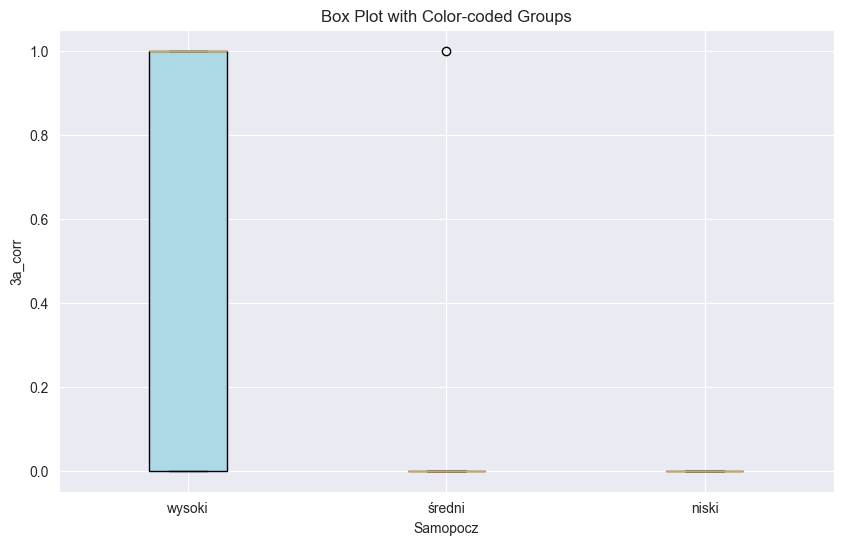

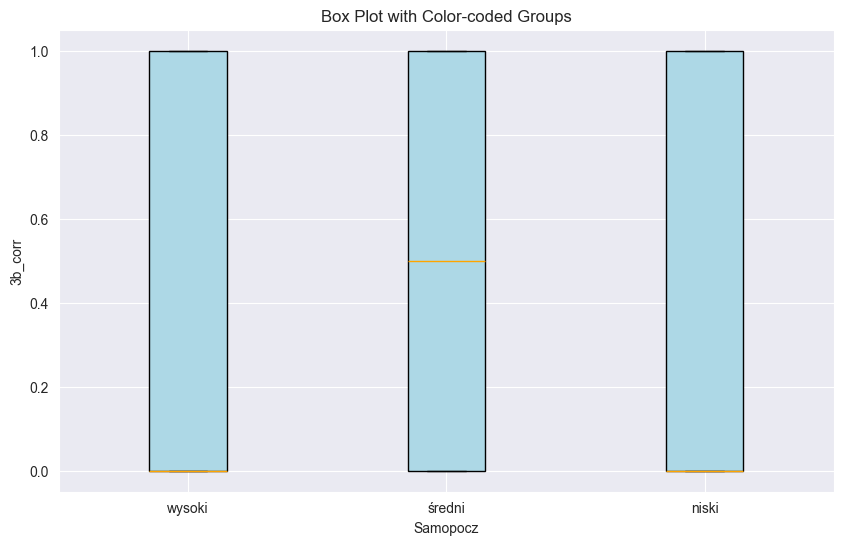

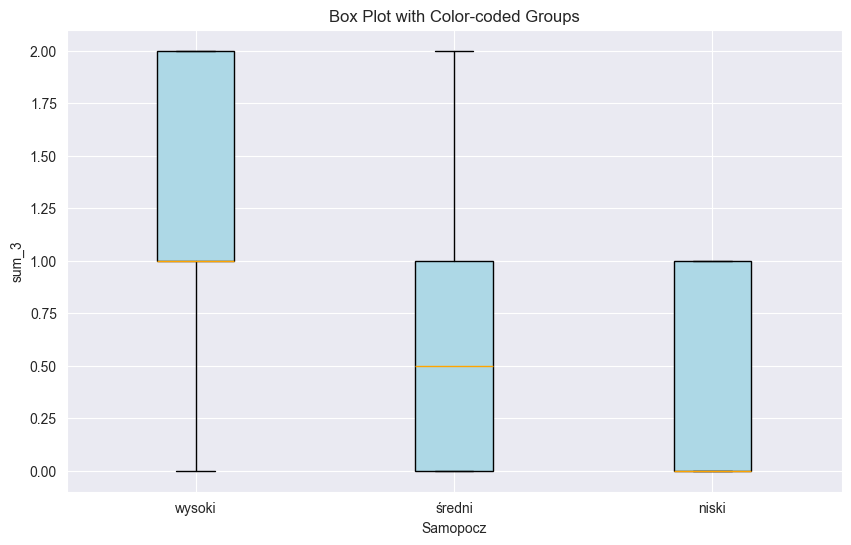

In [48]:
merged_df['sum_3'] = merged_df['3a_corr'] + merged_df['3b_corr']
wellbeing_plots('3a_corr')
wellbeing_plots('3b_corr')
wellbeing_plots('sum_3')

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_2177/221523007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.stripplot(x='Samopocz', y='3a_corr', data=merged_df, jitter=True, palette='Set2')
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_2177/221523007.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.stripplot(x='Samopocz', y='3b_corr', data=merged_df, jitter=True, palette='Set2')


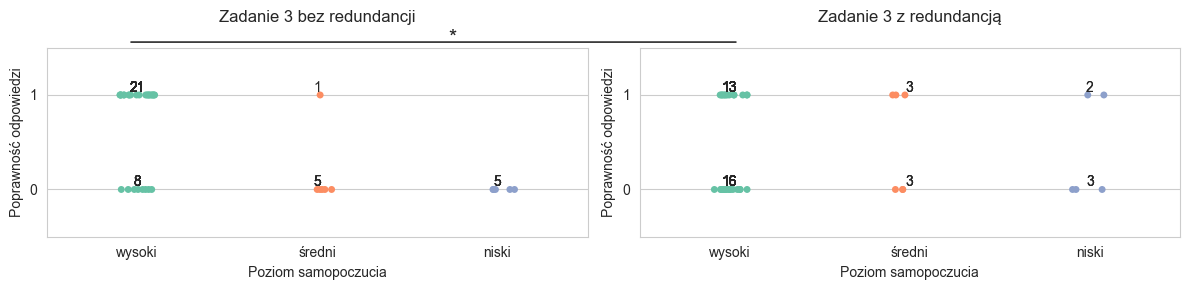

In [59]:
plt.figure(figsize=(12, 3))

sns.set_style('whitegrid')
plt.subplot(1, 2, 1)
ax1 = sns.stripplot(x='Samopocz', y='3a_corr', data=merged_df, jitter=True, palette='Set2')
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1])
plt.xticks([0, 1, 2], ['wysoki', 'średni', 'niski'])
plt.xlabel('Poziom samopoczucia')
plt.ylabel('Poprawność odpowiedzi')
plt.title('Zadanie 3 bez redundancji\n')
plt.annotate('', xy=(0.15, 1.03), xycoords='axes fraction', xytext=(1.28, 1.03),
             textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.75, 1), xycoords='axes fraction',
             textcoords='axes fraction', ha='center', va='bottom', fontsize=15)

for category in merged_df['Samopocz'].unique():
    y_values = merged_df[merged_df['Samopocz'] == category]['3a_corr']
    x_positions = [category] * len(y_values)
    count_0 = sum(1 for value in y_values if value == 0)
    count_1 = sum(1 for value in y_values if value == 1)

    for x, y in zip(x_positions, y_values):
        ax1.text(x, y, str(count_0) if y == 0 else str(count_1), ha='center', va='bottom', fontweight='light',
                 fontsize=10)

plt.subplot(1, 2, 2)
ax2 = sns.stripplot(x='Samopocz', y='3b_corr', data=merged_df, jitter=True, palette='Set2')
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1])
plt.xlabel('Poziom samopoczucia')
plt.ylabel('Poprawność odpowiedzi')
plt.title('Zadanie 3 z redundancją\n')

for category in merged_df['Samopocz'].unique():
    y_values = merged_df[merged_df['Samopocz'] == category]['3b_corr']
    x_positions = [category] * len(y_values)
    count_0 = sum(1 for value in y_values if value == 0)
    count_1 = sum(1 for value in y_values if value == 1)

    for x, y in zip(x_positions, y_values):
        ax2.text(x, y, str(count_0) if y == 0 else str(count_1), ha='center', va='bottom', fontweight='light',
                 fontsize=10)

plt.tight_layout()

plt.show()